In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
train_dir = r"D:\Ishraq\Project\Datasetsmall\Train"
test_dir = r"D:\Ishraq\Project\Datasetsmall\Test"
validation_dir =  r"D:\Ishraq\Project\Datasetsmall\Validation"

In [4]:
def check_dist(dir):
    print(f"{dir.split('/')[-1]} dataset")
    if os.path.exists(dir):
        real_path = os.path.join(dir,'Real')
        fake_path = os.path.join(dir,'Fake')
        print(f"Real data count: {len(os.listdir(real_path))}")
        print(f"Fake data count: {len(os.listdir(fake_path))}")
    else:
        print("Directory Not Found")
    print()

In [5]:
check_dist(train_dir)
check_dist(validation_dir)
check_dist(test_dir)

D:\Ishraq Project\Datasetsmall\Train dataset
Real data count: 35000
Fake data count: 35000

D:\Ishraq Project\Datasetsmall\Validation dataset
Real data count: 9000
Fake data count: 9000

D:\Ishraq Project\Datasetsmall\Test dataset
Real data count: 3000
Fake data count: 3000



In [6]:
def normalize_image(image, labels):
  image = tf.cast(image, tf.float32) / 255.0
  return image, labels

In [7]:
%%time
IMG_SIZE = (256, 256)

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode = 'categorical',
                                                                 batch_size = 64,
                                                                 image_size= IMG_SIZE)
validation_data = tf.keras.preprocessing.image_dataset_from_directory(validation_dir,
                                                                 label_mode = 'categorical',
                                                                 batch_size = 64,
                                                                 image_size= IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode = 'categorical',
                                                                 batch_size = 32,
                                                                 image_size= IMG_SIZE,
                                                                shuffle = False)

Found 70000 files belonging to 2 classes.
Found 18000 files belonging to 2 classes.
Found 6000 files belonging to 2 classes.
CPU times: total: 2.84 s
Wall time: 14.9 s


In [8]:
train_data = train_data.map(normalize_image)
validation_data = validation_data.map(normalize_image)
test_data = test_data.map(normalize_image)

In [9]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(256,256,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(2,activation='softmax')  
])

In [10]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
                loss = 'BinaryCrossentropy',
                metrics=['accuracy'])


model_checkpoint = ModelCheckpoint(filepath='/kaggle/working/model_epoch_{epoch:02d}.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [11]:
%time
history = model.fit(train_data,
                    epochs = 30,
                    validation_data = validation_data,
                    validation_steps = int(0.7 * len(validation_data)),
                    callbacks=[model_checkpoint, early_stopping]
                    )

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/30
1094/1094 [==============================] - ETA: 0s - loss: 0.4953 - accuracy: 0.7602

C:\Users\Adnan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1094/1094 [==============================] - 4416s 4s/step - loss: 0.4953 - accuracy: 0.7602 - val_loss: 0.4839 - val_accuracy: 0.7513
Epoch 2/30
1094/1094 [==============================] - 4778s 4s/step - loss: 0.2421 - accuracy: 0.9016 - val_loss: 0.2553 - val_accuracy: 0.8909
Epoch 3/30
1094/1094 [==============================] - 4483s 4s/step - loss: 0.1621 - accuracy: 0.9371 - val_loss: 0.1941 - val_accuracy: 0.9222
Epoch 4/30
1094/1094 [==============================] - 3749s 3s/step - loss: 0.1247 - accuracy: 0.9512 - val_loss: 0.2299 - val_accuracy: 0.9216
Epoch 5/30
1094/1094 [==============================] - 3725s 3s/step - loss: 0.1018 - accuracy: 0.9604 - val_loss: 0.1921 - val_accuracy: 0.9334
Epoch 6/30
1094/1094 [==============================] - 3625s 3s/step - loss: 0.0844 - accuracy: 0.9680 - val_loss: 0.2571 - val_accuracy: 0.9016
Epoch 7/30
1094/1094 [==============================] - 3594s 3s/step - loss: 0.0734 - accuracy: 0.9714 - val_loss: 0.1767 - val_accura

In [18]:
import pickle
save_directory = r"D:\Ishraq\Project\extraa"
file_name = 'history.pkl'

# Save the training history to a file in the specified directory
with open(os.path.join(save_directory, file_name), 'wb') as file:
    pickle.dump(history.history, file)

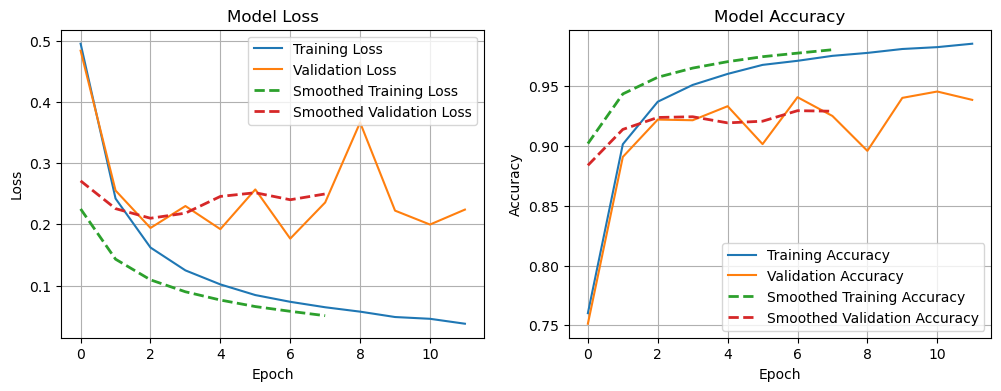

In [276]:
plt.figure(figsize=(12, 4))

# Plot training & validation loss values with a smoothed curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(np.convolve(history.history['loss'], np.ones((5,))/5, mode='valid'), linestyle='dashed', linewidth=2, label='Smoothed Training Loss')
plt.plot(np.convolve(history.history['val_loss'], np.ones((5,))/5, mode='valid'), linestyle='dashed', linewidth=2, label='Smoothed Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot training & validation accuracy values with a smoothed curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(np.convolve(history.history['accuracy'], np.ones((5,))/5, mode='valid'), linestyle='dashed', linewidth=2, label='Smoothed Training Accuracy')
plt.plot(np.convolve(history.history['val_accuracy'], np.ones((5,))/5, mode='valid'), linestyle='dashed', linewidth=2, label='Smoothed Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()


In [20]:
test_dir = r"D:\Ishraq\Project\Datasetsmall\Test"
model.evaluate(test_data)

188/188 [==============================] - 71s 374ms/step - loss: 0.2600 - accuracy: 0.8942


[0.25999346375465393, 0.8941666483879089]

188/188 [==============================] - 73s 376ms/step - loss: 0.2600 - accuracy: 0.8942


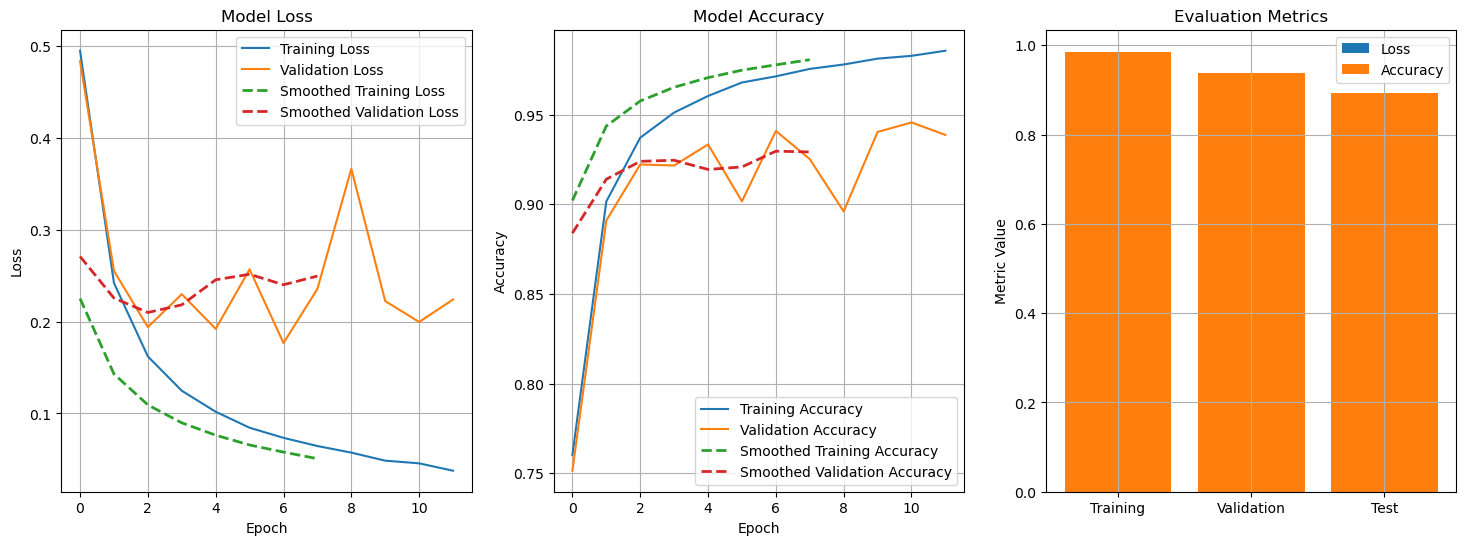

In [447]:
plt.figure(figsize=(18, 6))

# Plot training & validation loss values with smoothed curves
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(np.convolve(history.history['loss'], np.ones((5,))/5, mode='valid'), linestyle='dashed', linewidth=2, label='Smoothed Training Loss')
plt.plot(np.convolve(history.history['val_loss'], np.ones((5,))/5, mode='valid'), linestyle='dashed', linewidth=2, label='Smoothed Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot training & validation accuracy values with smoothed curves
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(np.convolve(history.history['accuracy'], np.ones((5,))/5, mode='valid'), linestyle='dashed', linewidth=2, label='Smoothed Training Accuracy')
plt.plot(np.convolve(history.history['val_accuracy'], np.ones((5,))/5, mode='valid'), linestyle='dashed', linewidth=2, label='Smoothed Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot evaluation metrics
plt.subplot(1, 3, 3)
evaluation_results = model.evaluate(test_data)
test_loss, test_accuracy = evaluation_results[0], evaluation_results[1]

plt.bar(['Training', 'Validation', 'Test'], [history.history['loss'][-1], history.history['val_loss'][-1], test_loss], label='Loss')
plt.bar(['Training', 'Validation', 'Test'], [history.history['accuracy'][-1], history.history['val_accuracy'][-1], test_accuracy], label='Accuracy')
plt.title('Evaluation Metrics')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)

plt.show()


In [277]:

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


188/188 [==============================] - 86s 455ms/step
              precision    recall  f1-score   support

        Real       0.92      0.86      0.89      3000
        Fake       0.87      0.93      0.90      3000

    accuracy                           0.89      6000
   macro avg       0.90      0.89      0.89      6000
weighted avg       0.90      0.89      0.89      6000



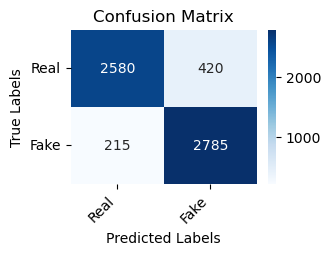

In [278]:
predicted_probs = model.predict(test_data, verbose=1)
predicted_labels = np.argmax(predicted_probs, axis=1)
test_labels = [labels for _ , labels in test_data]
test_labels = np.concatenate(test_labels, axis=0)
test_labels_0 = np.argmax(test_labels,axis=1)
cm = confusion_matrix(test_labels_0, predicted_labels)
accuracy = accuracy_score(test_labels_0, predicted_labels)
cm, accuracy
class_names = ['Real', 'Fake']
report = classification_report(test_labels_0, predicted_labels, target_names=class_names)
print(report)
plt.figure(figsize=(3, 2))
class_names = ['Real', 'Fake']
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
heatmap.set_xticklabels(class_names, rotation=45, ha='right')
heatmap.set_yticklabels(class_names, rotation=0)

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [245]:
from sklearn.metrics import accuracy_score

# Create a generator for the validation set
validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_data_gen = validation_generator.flow_from_directory(
    validation_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# Get predictions on the validation set
validation_predictions = model.predict(validation_data_gen)

# Convert one-hot encoded labels to class indices
validation_labels = validation_data_gen.classes

# Convert model predictions to class indices
predicted_classes = np.argmax(validation_predictions, axis=1)

# Compute metrics
accuracy = accuracy_score(validation_labels, predicted_classes)
confusion_mat = confusion_matrix(validation_labels, predicted_classes)
classification_rep = classification_report(validation_labels, predicted_classes)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f"Classification Report:\n{classification_rep}")


Found 18000 images belonging to 2 classes.
282/282 [==============================] - 237s 839ms/step
Accuracy: 0.9404444444444444
Confusion Matrix:
[[8627  373]
 [ 699 8301]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      9000
           1       0.96      0.92      0.94      9000

    accuracy                           0.94     18000
   macro avg       0.94      0.94      0.94     18000
weighted avg       0.94      0.94      0.94     18000



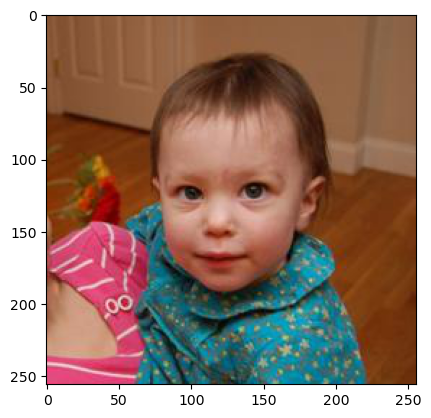

In [416]:
from keras.preprocessing import image

img = image.load_img(r"D:\Ishraq\Project\Datasetsmall\Validation\Real\real_96.jpg")
plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 31ms/step


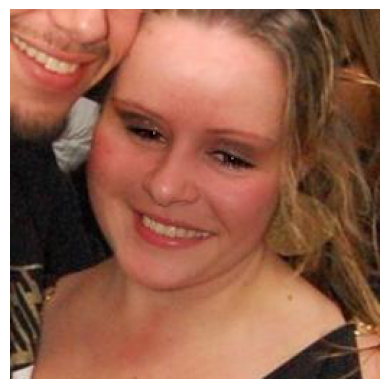

Predicted Class: Fake
Probability: 1.0
1/1 [==============================] - 0s 32ms/step


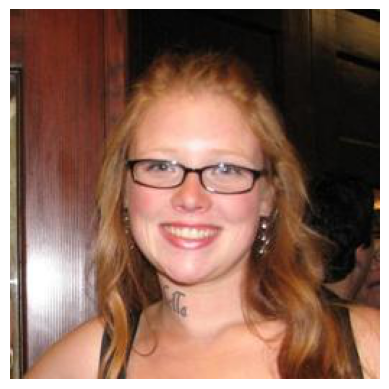

Predicted Class: Real
Probability: 1.0


In [449]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def predict_and_visualize_image(image_path, model, class_names):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(256, 256))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    # Make predictions
    predictions = model.predict(img)

    # Get the predicted class index using argmax
    predicted_class_index = np.argmax(predictions)

    # Get the predicted class and probability
    predicted_class = class_names[predicted_class_index]
    probability = predictions[0, predicted_class_index]

    # Visualize the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    plt.show()

    # Print the prediction results
    print("Predicted Class:", predicted_class)
    print("Probability:", probability)

# Example usage for a fake image from the "Fake" dataset
fake_image_path = r"D:\Ishraq\Project\Datasetsmall\Validation\Fake\fake_1002.jpg"

predict_and_visualize_image(fake_image_path, model, fake_class_names)

# Example usage for a real image from the "Real" dataset
real_image_path = r"D:\Ishraq\Project\Datasetsmall\Validation\Real\real_1009.jpg"

predict_and_visualize_image(real_image_path, model, real_class_names)


In [366]:
print("Raw Output (Logits):")
print(raw_predictions)


Raw Output (Logits):
[[9.9999964e-01 3.9580570e-07]
 [9.9493814e-01 5.0618760e-03]
 [1.0000000e+00 5.0148254e-14]
 ...
 [7.2980044e-10 1.0000000e+00]
 [1.0235996e-04 9.9989760e-01]
 [6.8818994e-02 9.3118095e-01]]


In [371]:
from scipy.special import softmax

# Assuming 'index' is the index of the sample you want to inspect
sample_index = 1219 # Replace 0 with the actual index you want to inspect
sample_logits = raw_predictions[sample_index]

# Apply softmax to get probabilities
sample_probabilities = softmax(sample_logits)

# Print the probabilities for the specific sample
print(f"Probabilities for Sample {sample_index}:")
print(sample_probabilities)


Probabilities for Sample 1219:
[0.7310586 0.2689414]


In [428]:
# Assuming 'sample_probabilities' contains the predicted probabilities for a specific sample
threshold = 0.5

# Convert probabilities to binary predictions based on the threshold
predicted_class_index = 1 if sample_probabilities[1] > threshold else 0

# Assuming 'class_names' is a list of class names (e.g., ["Real", "Fake"])
predicted_class = class_names[predicted_class_index]

# Print the binary prediction
print(f"Binary Prediction for Sample {1219}: {predicted_class}")


Binary Prediction for Sample 1219: Real
